# Rede VGG19 com pesos ImageNet

Este notebook carrega a rede VGG19 com os pesos treinados da rede vencedora da ImageNet.

- A rede VGG19 é criada e carregada com os pesos da ImageNet
- Uma imagem é preparada para fazer a predição
- A predição de uma imagem
- Mostra a classe da imagem de acordo com a classificação da ImageNet

A rede VGG19 é uma rede sequencial.

O código de criação da rede pode ser visto em:

- [https://github.com/fchollet/deep-learning-models](https://github.com/fchollet/deep-learning-models)

<img src="../figures/VGG19.png", width= 500pt></img>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing import image

import keras
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications.vgg19 import VGG19
import json
K.set_image_data_format("channels_last")

Using TensorFlow backend.


In [2]:
CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'
def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results

def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.image_dim_ordering()
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


In [3]:
model = VGG19(weights='imagenet')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

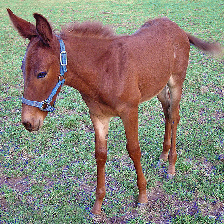

In [4]:
#img_path = '../../datasets/images/horse.png'
img_path = '../../datasets/images/mula.png'
#img_path = '../../datasets/images/Moremi_elephant.png'
img = image.load_img(img_path, target_size=(224, 224))
img

(224, 224, 3)

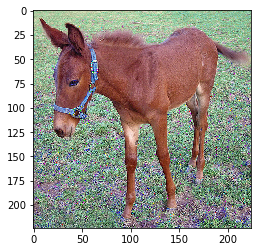

In [5]:
# Convertendo para NumPy Array e mostrando com matplotlib
x = image.img_to_array(img)
plt.imshow(255-x)
x.shape

In [6]:
x = np.expand_dims(x, axis=0)
print(x.shape)

(1, 224, 224, 3)


In [7]:
x = preprocess_input(x)

In [8]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds))

Predicted: [[('n02389026', 'sorrel', 0.99989343), ('n02403003', 'ox', 2.0122427e-05), ('n02422106', 'hartebeest', 1.5127419e-05), ('n02437312', 'Arabian_camel', 1.3854441e-05), ('n02105412', 'kelpie', 1.0621657e-05)]]
